In [54]:
import sparrowpy as sp
import pyfar as pf
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

base_dir = os.path.join(os.getcwd(), "resources/")

c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\dsp\filter\fractional_octaves.py:252: UserWarning: The upper frequency limit 22387.2 Hz is above the Nyquist frequency. Using a highpass filter instead of a bandpass.
  sos = _coefficients_fractional_octave_bands(


1.4999773242630385


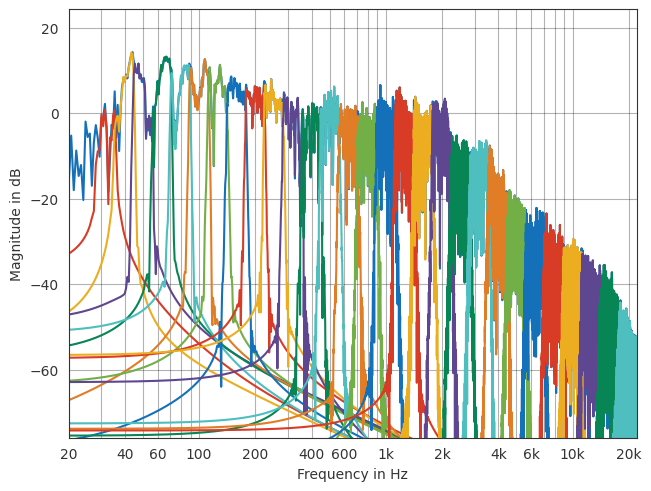

In [55]:
IR_measured=pf.io.read_audio(base_dir+'raw.wav')

IR_filtered = pf.dsp.filter.fractional_octave_bands(IR_measured,
                                                    3,
                                                    frequency_range=(31.5,20000))

pf.plot.freq(IR_measured)
pf.plot.freq(IR_filtered)

print(IR_filtered.signal_length)

In [56]:
# simulation settings
sr_etc = 500


In [57]:
# generate measured etc from IR data
sr_src = IR_measured.sampling_rate

duration = IR_measured.signal_length
n_etc_samples = int(duration*sr_etc)+1

etc_array = np.zeros((IR_filtered.cshape[0],n_etc_samples))

for freqbin in range(IR_filtered.cshape[0]):
    src=IR_filtered.time[freqbin,0,:]
    for i in range(src.shape[0]):
        etc_array[freqbin,int(sr_etc*i/sr_src)] += np.square(src[i])

etc = pf.Signal(data=etc_array,sampling_rate=sr_etc, comment="measured ETC")

<Axes: xlabel='Time in s', ylabel='Amplitude in dB'>

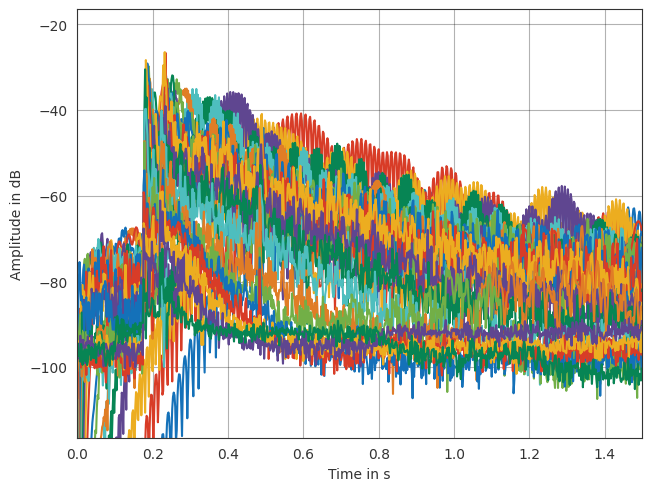

In [ ]:
pf.plot.time(etc[15],dB=True, log_prefix=10)